<a href="https://colab.research.google.com/github/sameerkhadka00/pyviz.org/blob/master/4_03_KernelSVMSt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kernel SVMS

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["savefig.dpi"] = 300
plt.rcParams['savefig.bbox'] = 'tight'

In [3]:
from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_blobs

## Example 1

Let us create blobs using `make_blobs` function from Scikitlearn. We will plot the scatter plot for the blobs using the two features of the dataset.

In [4]:
X,y=make_blobs(random_state=42)

In [5]:
X.shape

(100, 2)

In [6]:
np.unique(y, return_counts=True)

(array([0, 1, 2]), array([34, 33, 33]))

In [7]:
X[:3]

array([[-7.72642091, -8.39495682],
       [ 5.45339605,  0.74230537],
       [-2.97867201,  9.55684617]])

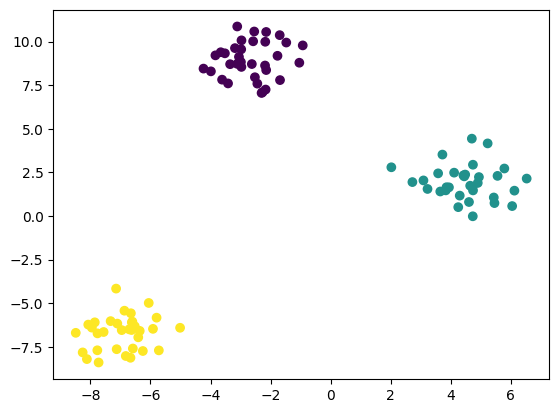

In [9]:
plt.scatter(X[:,0],X[:,1], c=y)

In [11]:
y=(y==0).astype(int)

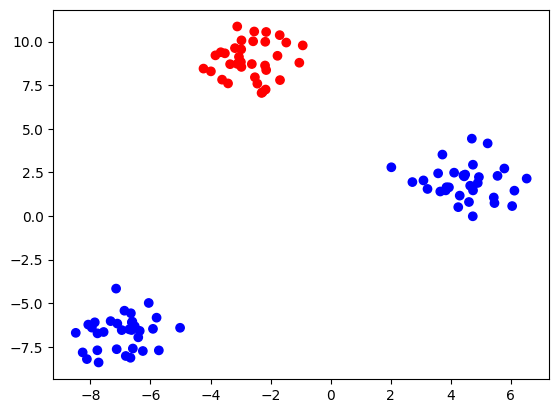

In [12]:
plt.scatter(X[:,0],X[:,1], c=y, cmap='bwr')

In [18]:
poly=PolynomialFeatures(include_bias=False)

In [20]:
X_poly=poly.fit_transform(X)

In [21]:
X.shape, X_poly.shape

((100, 2), (100, 5))

In [22]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2'], dtype=object)

Now let us fit the data to `Polynomialfeatures` to create additional polinomial features. Check the shape of the data before and after the transformation.

In [24]:
svm_l=SVC(kernel='linear') #use LinearSVC() instead of kernel for linear dataset

In [26]:
svm_p=SVC(kernel='poly', degree=2, coef0=1)

In [27]:
svm_l.fit(X_poly,y)

SVC(kernel='linear')

In [28]:
svm_l.coef_

array([[-0.00237758,  0.00729089, -0.00655987, -0.03321445,  0.02955095]])

In [29]:
svm_l.intercept_

array([-1.0319592])

In [30]:
x_new=[[2,-4]]

In [35]:
x_new_p=poly.transform(x_new)

In [36]:
x_new_p

array([[ 2., -4.,  4., -8., 16.]])

In [31]:
X.shape

(100, 2)

In [37]:
svm_l.predict(x_new_p)

array([0])

In [39]:
c=svm_l.coef_

In [41]:
c.shape

(1, 5)

In [42]:
x_new_p.shape


(1, 5)

In [46]:
np.sign(np.dot(c,x_new_p.T)+svm_l.intercept_)

array([[-1.]])

In [47]:
svm_l.dual_coef_

array([[-0.00027289, -0.00076636,  0.00103925]])

In [48]:
svm_l.support_

array([33, 50, 85], dtype=int32)

In [49]:
X_poly[[33,50,85]]

array([[ -5.72103161,  -7.70079191,  32.73020271,  44.05647396,
         59.30219607],
       [  2.02013373,   2.79507219,   4.0809403 ,   5.64641961,
          7.81242854],
       [ -2.30033403,   7.054616  ,   5.29153664, -16.22797325,
         49.76760697]])

In [50]:
svm_l.decision_function(x_new_p)

array([-0.35358657])

In [51]:
np.dot(c,x_new_p.T)+svm_l.intercept_

array([[-0.35358657]])

In [52]:
c

array([[-0.00237758,  0.00729089, -0.00655987, -0.03321445,  0.02955095]])

In [53]:
x_sup=X_poly[[33,50,85]]

In [54]:
x_sup.shape

(3, 5)

In [55]:
c_dual=svm_l.dual_coef_

In [58]:
c_dual.shape

(1, 3)

In [60]:
np.dot(np.dot(c_dual,x_sup),x_new_p.T)+svm_l.intercept_

array([[-0.35358657]])

In [61]:
svm_p=SVC(kernel='poly', degree=2, coef0=1)

In [62]:
svm_p.fit(X,y)

SVC(coef0=1, degree=2, kernel='poly')

In [74]:
svm_p.dual_coef_

array([[-1.        , -0.07937075, -0.06792401,  0.14729476,  1.        ]])

In [65]:
svm_p.intercept_

array([-1.04554285])

In [64]:
svm_p.support_

array([50, 64, 87, 57, 85], dtype=int32)

In [66]:
x_new

[[2, -4]]

In [67]:
svm_p.decision_function(x_new)

array([-1.66984751])

In [68]:
X[svm_p.support_]

array([[ 2.02013373,  2.79507219],
       [-7.14428402, -4.15994043],
       [ 3.7204546 ,  3.52310409],
       [-2.26723535,  7.10100588],
       [-2.30033403,  7.054616  ]])

In [75]:
np.dot(np.dot(svm_p.dual_coef_,X[svm_p.support_]),np.array(x_new).T)+svm_p.intercept_

array([[-31.31114015]])

Fit `svc` with a linear kernel on the transformed dataset. Later, fit `svc` with a polynomial kernel on the original dataset. Check the coefficients, dual coefficients, and support for both linear and kernel svm models.

## Example 2

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score,train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits

Load digits dataset from scikitlearn using `load_digits()` function, create train and test datasets. Print the fitst eight digits on the screen.

Create a pipeline using `StandardScaler` and `SVC`. Find the cross validation score for both nont-scaled and scaled datasets for SVC.

In [ ]:
from sklearn.pipeline import make_pipeline

Create a grid search for `C` and `gamma` parameters of `SVC`. turn the grid search results in to a dataframe and check the results.